###  AMEO Data Analysis

### Data Description

* The Aspiring Mind Employment Outcome 2015 (AMEO) dataset, released by Aspiring Minds,
focuses on employment outcomes for engineering graduates. It includes dependent variables such
as Salary, Job Titles, and Job Locations, along with standardized scores in cognitive skills, technical
skills, and personality skills. With around 40 independent variables and 4000 data points, these
variables encompass both continuous and categorical data. The dataset also includes demographic
features and unique identifiers for each candidate.

### Objective

* Understanding link between various variables and the target variable 'salary'

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#### importing datset

In [2]:
data = pd.read_excel(r"C:\Users\LENOVO\Downloads\data (1).xlsx")

In [3]:
data

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [4]:
data.shape # shape of dataset -we have  3998 row and 30 columns

(3998, 39)

In [5]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [6]:
data.info()   # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [7]:
data.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


### Missing values

In [8]:
data.isna().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

### Dropping ununnecessary columns

In [9]:
data.drop(['Unnamed: 0','ID','CollegeID','CollegeCityID'],axis = 1,  inplace = True)

* As The survey was conducted back in 2015 so that replacing 'present' value by 2015-12-31.

In [10]:
data['DOL'].replace({'present':'2015-12-31'},inplace=True)
data['DOL']= pd.to_datetime(data['DOL'])

In [11]:
data['DOL']

0      2015-12-31
1      2015-12-31
2      2015-12-31
3      2015-12-31
4      2015-03-01
          ...    
3993   2012-10-01
3994   2013-07-01
3995   2015-12-31
3996   2015-01-01
3997   2015-12-31
Name: DOL, Length: 3998, dtype: datetime64[ns]

In [12]:
from datetime import datetime

In [13]:
data['DOB'] = pd.to_datetime(data['DOB'])

In [14]:
data['age'] = 2015 - data['DOB'].dt.year

In [15]:
data['age'] #creating age column

0       25
1       26
2       23
3       26
4       24
        ..
3993    28
3994    23
3995    24
3996    23
3997    24
Name: age, Length: 3998, dtype: int32

In [16]:
data['Experience'] = data['DOL'].dt.year - data['DOJ'].dt.year  #creating experiance column

In [17]:
data.drop(data[data['Experience'] == data['age']].index , inplace = True)

### Finding Duplicates

In [18]:
data.duplicated().sum()  #there is no duplicate values

0

### Data Type conversion

In [19]:
data['Salary'] = data['Salary'].astype('float64')
data['GraduationYear'] = data['GraduationYear'].astype('int32')

### Correcting Structural errors

* As there are many cities which are misspelled we are correcting that using fuzzywuzzy method

In [20]:
data['JobCity'].unique()

data['JobCity'].replace({'Vizag':'Visakhapatnam','VIZAG':'Visakhapatnam','vizag':'Visakhapatnam','Trivandrum':'Thiruvananthapuram',' Trivandrum':'Thiruvananthapuram','TRIVANDRUM':'Thiruvananthapuram','Bengaluru':'Bangalore','ncr':'New Delhi','AM':'N/A','Nasikcity':'Nashik','Technopark, Trivandrum':'Technopark, Thiruvananthapuram','Trivandrum ':'Thiruvananthapuram','Gajiabaad':'Ghaziabad','orissa':'Odisha','pondi':'Pondicherry','pondy':'Pondicherry','punr':'Pune',-1:'N/A','Calicut':'Kolkata'},inplace=True)

In [21]:
from fuzzywuzzy import process

def correct_spelling_errors(target_word,choices=['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
                                                 'Hyderabad', 'Noida', 'Kolkata', 'Pune','N/A','Jhansi',
                                                 'Bhubaneswar', 'Mumbai', 'New Delhi',
                                                 'Mangalore', 'Rewari', 'Ghaziabad', 'Bhiwadi', 'Mysore', 'Rajkot',
                                                 'Jaipur', 'Thane', 'Maharajganj', 'Thiruvananthapuram', 'Panchkula',
                                                 'Coimbatore', 'Dhanbad', 'Lucknow', 'Gandhinagar', 'Unnao', 'Daman and Diu',
                                                 'Nagpur', 'Bhagalpur', 'New Delhi', 'Ahmedabad', 'Kochi',
                                                 'Bankura', 'Kanpur', 'Vijayawada', 'Beawar', 'Alwar', 'Siliguri', 'Raipur',
                                                 'Bhopal', 'Faridabad', 'Jodhpur', 'Udaipur', 'Muzaffarpur', 'Bulandshahar',
                                                 'Haridwar', 'Raigarh', 'Visakhapatnam', 'Jabalpur', 'Unnao', 'Aurangabad',
                                                 'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur', 'Dharamshala',
                                                 'Hissar', 'Ranchi', 'Madurai', 'Chandigarh', 'Australia', 'Cheyyar', 'Sonipat',
                                                 'Jagdalpur', 'Angul', 'Baroda', ' Ariyalur', 'Jowai','Kochi/Cochin', 'Chennai and Coimbatore',
                                                 'Neemrana', 'Tirupati', 'Dubai', 'Ahmednagar', 'Nashik', 'Bellary', 'Ludhiana', 'Muzaffarnagar',
                                                 'Gagret', 'Indirapuram, Ghaziabad','Gwalior', 'Chennai & Mumbai', 'Rajasthan', 'Bareli',
                                                 'Hospet', 'Miryalaguda', 'Dharuhera', 'Meerut', 'Dehradun', 'Ganjam', 'Hubli',
                                                 'Agra', 'Trichy', 'Kudankulam , Tarapur', 'Ongole', 'Sambalpur', 'Pondicherry',
                                                 'Sadulpur', 'Bikaner', 'Vadodara', 'India', 'Asansol',
                                                 'Tirunelvelli', 'Ernakulam', 'Bilaspur', 'Chandrapur', 'Nanded','Dharmapuri', 'Vandavasi', 'Rohtak',
                                                 'Patna','Salem','Thiruvananthapuram', 'Bharuch', 'Tornagallu', 'Jaspur', 'Burdwan',
                                                 'Shimla', 'Jammu', 'Shahdol','Muvattupuzha', 'Al Jubail', 'Kalmar, Sweden','Secunderabad',
                                                 'Ratnagiri', 'Jhajjar', 'Gulbarga', 'Nalagarh', 'Jeddah', 'Jamnagar', 'Gonda',
                                                 'Odisha', 'Kharagpur', 'Navi Mumbai , Hyderabad', 'Joshimath', 'Bathinda', 'Johannesburg', 'Kala Amb',
                                                 'Karnal','London', 'Kota', 'Baddi', 'Nagari', 'Mettur', 'Durgapur', 'Bahadurgarh',
                                                 'Rayagada, Odisha', 'Kakinada', 'Surat', 'Kurnool', 'Kolhapur', 'Bhilai', 'Nellore', 'Meerut',
                                                 'Sahibabad', 'Howrah', 'Trichur', 'Ambala', 'Khopoli', 'Kerala', 'Roorkee', 'Allahabad',
                                                 'Delhi', 'Jalandhar', 'Manesar', 'Vapi', 'Pilani', 'Ras Al Khaimah', 'Bihar', 'Singaruli', 'Mohali',
                                                 'Phagwara', 'Baripada', 'Yamunanagar', 'Shahibabad', 'Sampla', 'Guwahati', 'Rourkela', 'Vellore', 'Dausa',
                                                 'Latur', 'Mainpuri', 'Rae Bareli', 'Dammam', 'Haldia', 'Patiala', 'Gorakhpur',
                                                 'Karad', 'Rajpura', 'Haryana'], threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [22]:
data['JobCity'] = data['JobCity'].apply(correct_spelling_errors)

In [23]:
data['JobCity']

0       Bangalore
1          Indore
2         Chennai
3         Gurgaon
4         Manesar
          ...    
3993    New Delhi
3994    Hyderabad
3995    Bangalore
3996    Bangalore
3997      Chennai
Name: JobCity, Length: 3997, dtype: object

In [24]:
data['Specialization'].replace({'electronics & instrumentation eng': 'electronics and instrumentation engineering', 'mechatronics':'mechanical engineering'},inplace=True)

In [25]:
#replacing 0 and -1 value by nan value

In [26]:
data['10board'] = data['10board'].replace({'0':np.nan})
data['12board'] = data['12board'].replace({'0':np.nan})
data['GraduationYear'] = data['GraduationYear'].replace({0:np.nan})
data['JobCity'] = data['JobCity'].replace({-1:np.nan})
data['Domain'] = data['Domain'].replace({-1:np.nan})
data['ElectronicsAndSemicon'] = data['ElectronicsAndSemicon'].replace({-1:0})
data['ComputerScience'] = data['ComputerScience'].replace({-1:0})
data['ComputerProgramming'] = data['ComputerProgramming'].replace({-1:np.nan})

### Univariate analysis

In [27]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'age', 'Experience'],
      dtype='object')

### Categorical

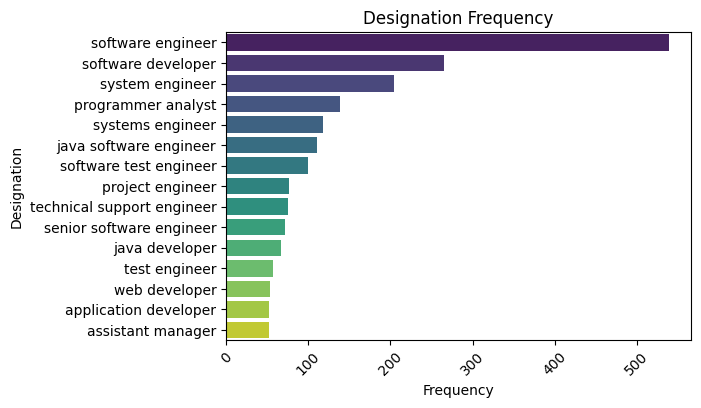

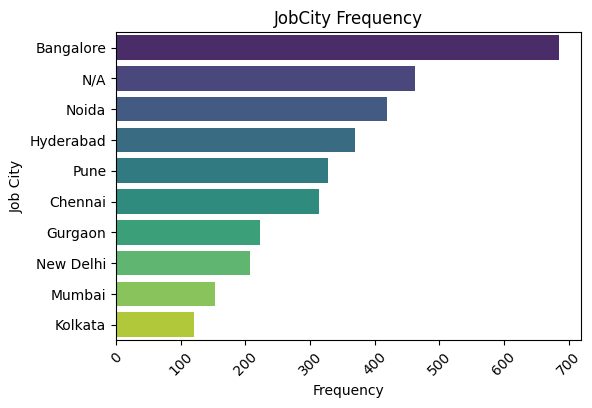

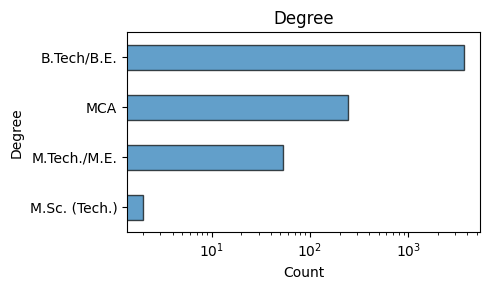

In [28]:
#Designation
top_Designation = data['Designation'].value_counts().head(15)

plt.figure(figsize=(6,4))
sns.barplot(y=top_Designation.index, x=top_Designation.values, palette="viridis")
plt.title('Designation Frequency')
plt.xlabel('Frequency')
plt.ylabel('Designation')          
plt.xticks(rotation=45)  # Rotates the category names to prevent overlap
plt.show()

# city
top_city = data['JobCity'].value_counts().head(10)

plt.figure(figsize=(6,4))
sns.barplot(y=top_city.index, x=top_city.values, palette="viridis")
plt.title('JobCity Frequency')
plt.xlabel('Frequency')
plt.ylabel('Job City')          
plt.xticks(rotation=45)  # Rotates the category names to prevent overlap
plt.show()

# Degree

data['Degree'].value_counts().sort_values(ascending=True).plot(
kind='barh',
title='Degree',
figsize=(5, 3),
ec='k',
alpha=0.7,
    )
plt.ylabel('Degree')
plt.xlabel('Count')
plt.xscale('log')
plt.tight_layout()
plt.show()

#### Designation

* As from the Designation column the most designations are of Software Engineer followed by softerware developer and system engineer.

* web developer, application developer,assistant manager has almost same frequency.

#### Job city

* In job city preferences, Benglore is the most fevorable city for job placements,followed by noida, Hyderabad and pune, 

* Mumbai and kolkata are less preferred.

### Degree

* Most student have pursued a B.Tech degree, with minimal representaion from M.Sc(Tech) graduate.

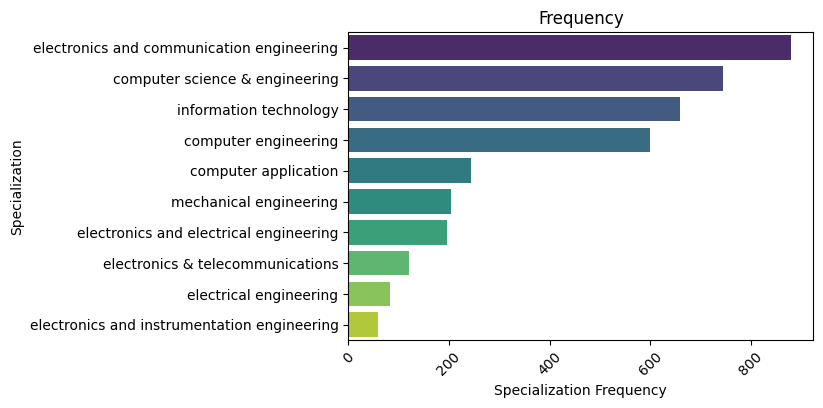

In [29]:
collage_state = data['Specialization'].value_counts().head(10)

plt.figure(figsize=(6,4))
sns.barplot(y=collage_state.index, x=collage_state.values, palette="viridis")
plt.title( 'Frequency')
plt.xlabel('Specialization Frequency')
plt.ylabel('Specialization')          
plt.xticks(rotation=45)  # Rotates the category names to prevent overlap
plt.show()

### collage state

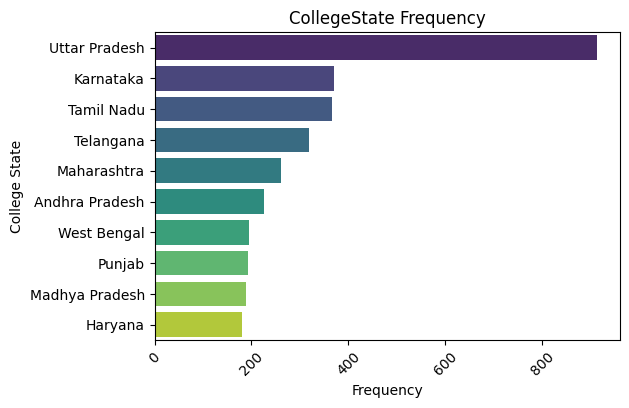

In [30]:
collage_state = data['CollegeState'].value_counts().head(10)

plt.figure(figsize=(6,4))
sns.barplot(y=collage_state.index, x=collage_state.values, palette="viridis")
plt.title('CollegeState Frequency')
plt.xlabel('Frequency')
plt.ylabel('College State')          
plt.xticks(rotation=45)  # Rotates the category names to prevent overlap
plt.show()

### college state 

* most of the college state is UP followed by Karnataka and Tamil Nadu.

### Numerical

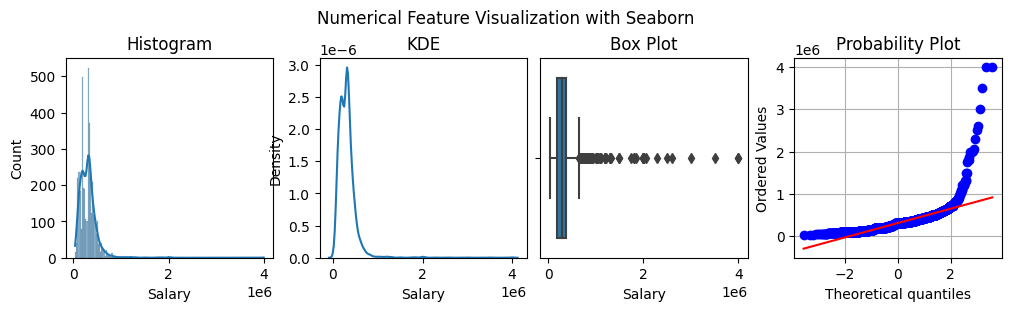

In [31]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram")
sns.histplot(data=data, x='Salary', kde= True, ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=data, x='Salary', ax=axs[1])

axs[2].set_title("Box Plot")
sns.boxplot(data=data, x='Salary', ax=axs[2])

stats.probplot(data['Salary'], dist=stats.norm, plot=axs[3])
axs[3].grid()

plt.show()

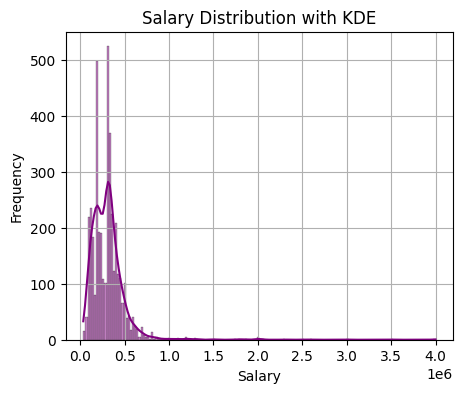

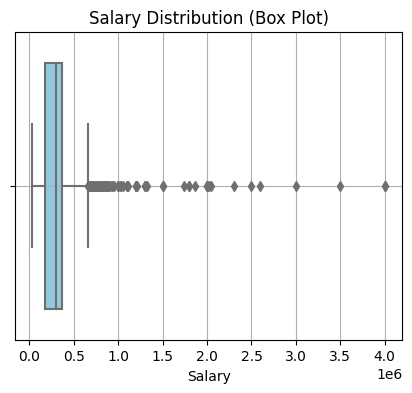

In [32]:
plt.figure(figsize=(5, 4))
sns.histplot(data['Salary'], kde=True, color='purple', edgecolor='black')
plt.title('Salary Distribution with KDE')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


plt.figure(figsize=(5, 4))
sns.boxplot(x='Salary', data=data, color='skyblue')
plt.title('Salary Distribution (Box Plot)')
plt.xlabel('Salary')
plt.grid(True)
plt.show()

### Salary

* salary graph is right skewed that means there are outliers at hight salary.most of the salary is btw 35k to 1 lacks

In [33]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'age', 'Experience'],
      dtype='object')

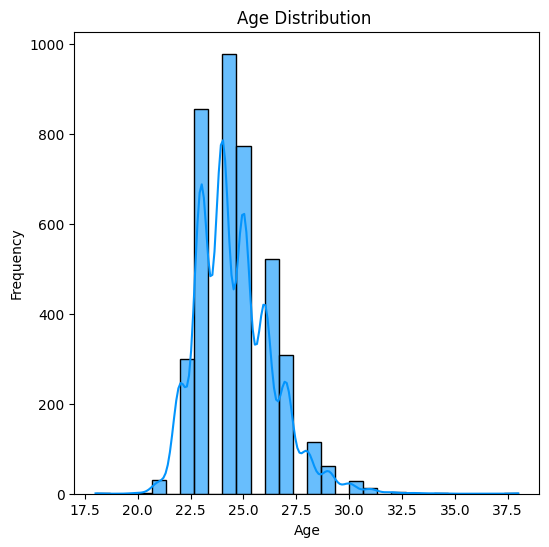

In [34]:
plt.figure(figsize=(6, 6))  # Set the figure size
sns.histplot(data['age'], kde=True, bins=30, color='#0394fc', alpha=0.6)


plt.title('Age Distribution ')  # Add a title
plt.xlabel('Age')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis

# Show the plot
plt.show()

* Most of the students are under 26 years old, with the majority aged between 22 to 25 and notable
  outliers at both ends of the age spectrum.

### Bivariate Analysis

#### Categorical Vs Numerical

### Gender VS salary

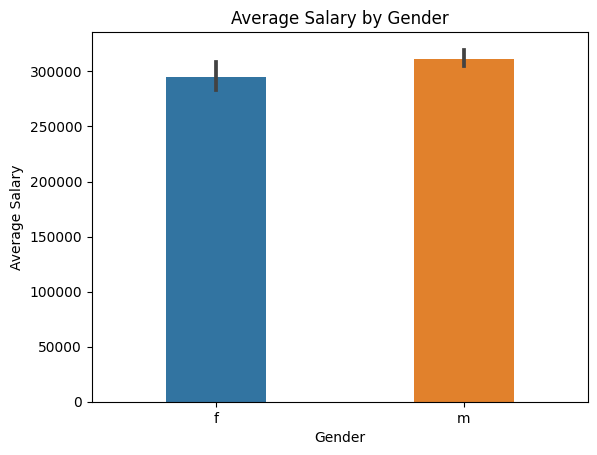

In [35]:
sns.barplot(x='Gender', y='Salary', data=data, estimator=np.mean,width=0.4)
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')

plt.show()

### Gender and salary

* from above graph we can see that both male and female salary are approximately equel, though female has some low average salary than male.

### Designation Vs salary

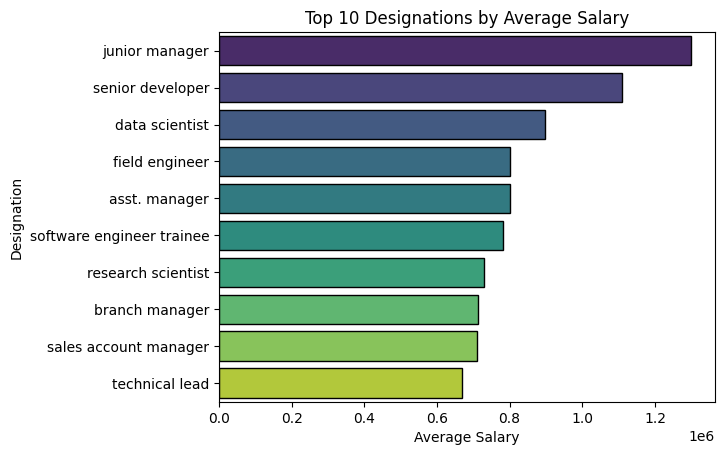

In [36]:
avg_salary_designation = data.groupby('Designation')['Salary'].mean().reset_index()


top_10_designation = avg_salary_designation.nlargest(10, 'Salary')


sns.barplot(data=top_10_designation, x = 'Salary', y = 'Designation', ec='k',palette = 'viridis')
plt.xlabel("Average Salary")
plt.ylabel("Designation")
plt.title("Top 10 Designations by Average Salary")
plt.show()

In [37]:

top_designations = (data.groupby('Designation')['Salary']
                    .max()
                    .nlargest(10)
                    .reset_index())


In [38]:
top_designations 

,Designation,Salary
0,automation engineer,4000000.0
1,senior software engineer,4000000.0
2,assistant system engineer,3500000.0
3,programmer,3000000.0
4,application developer,2600000.0
5,software test engineer,2500000.0
6,software developer,2300000.0
7,software engineer trainee,2050000.0
8,operations analyst,2020000.0
9,data scientist,2000000.0


* senior software engineer and automation engineer has the highest salary.

In [43]:
data.corr(numeric_only=True)

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age,Experience
Salary,1.000000,0.177684,-0.161406,0.170288,-0.179483,0.130215,0.015625,-0.212513,0.178088,0.179147,...,-0.047539,-0.022584,0.037685,-0.063542,0.058634,-0.010160,-0.055094,-0.010988,0.151873,0.360942
10percentage,0.177684,1.000000,0.269964,0.643423,-0.126001,0.312521,0.116605,0.096267,0.350903,0.316131,...,0.074389,0.049327,0.029986,0.067373,0.136271,-0.004707,-0.132335,0.036539,-0.243955,0.066701
12graduation,-0.161406,0.269964,1.000000,0.259167,0.027695,0.085999,-0.003025,0.793005,0.147936,0.105897,...,0.123749,0.023466,-0.004728,0.103347,0.041191,0.061954,-0.074365,-0.015082,-0.872417,-0.518569
12percentage,0.170288,0.643423,0.259167,1.000000,-0.100774,0.346141,0.130474,0.060308,0.212891,0.243574,...,0.064003,0.044204,0.005911,0.058336,0.104148,-0.007485,-0.094390,0.006339,-0.265782,0.078481
CollegeTier,-0.179483,-0.126001,0.027695,-0.100774,1.000000,-0.086767,-0.101454,-0.026177,-0.183887,-0.182854,...,0.002608,0.000029,-0.033715,0.055324,-0.037881,0.009981,0.023706,-0.019117,-0.043132,-0.047428
collegeGPA,0.130215,0.312521,0.085999,0.346141,-0.086767,1.000000,0.017436,0.083102,0.106509,0.196644,...,0.052248,-0.005243,-0.018956,0.069513,0.068197,-0.032693,-0.074813,0.028025,-0.113187,0.045768
CollegeCityTier,0.015625,0.116605,-0.003025,0.130474,-0.101454,0.017436,1.000000,-0.053331,0.050550,0.020436,...,0.010279,0.049828,-0.033411,0.014476,0.005061,-0.008228,0.004618,-0.016941,0.035572,0.046917
GraduationYear,-0.212513,0.096267,0.793005,0.060308,-0.026177,0.083102,-0.053331,1.000000,0.121907,0.094969,...,0.130093,-0.017571,0.002605,0.115586,0.025043,0.082620,-0.083194,-0.011680,-0.744954,-0.644203
English,0.178088,0.350903,0.147936,0.212891,-0.183887,0.106509,0.050550,0.121907,1.000000,0.444321,...,0.032465,-0.005782,-0.007712,0.035186,0.195629,0.018775,-0.155691,0.068103,-0.101080,-0.006321
Logical,0.179147,0.316131,0.105897,0.243574,-0.182854,0.196644,0.020436,0.094969,0.444321,1.000000,...,0.012029,-0.012909,-0.011274,0.026112,0.167805,-0.006930,-0.178945,0.048541,-0.098455,0.009171


In [46]:
data=data.groupby("Degree")["Salary"].sum().reset_index()
df=data.sort_values("Salary",ascending=False)

<Axes: xlabel='Degree', ylabel='Salary'>

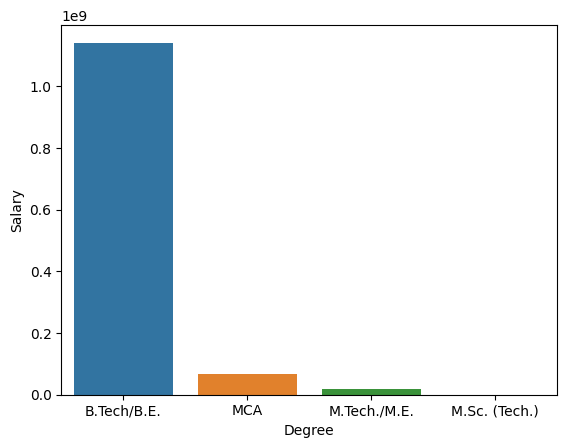

In [47]:
sns.barplot(data=df,x="Degree",y="Salary",)

## Research Question

#### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the  Gender?)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10948\1386871177.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Count', y='Specialization', hue='Gender', data=top_gender_counts, ci=None)


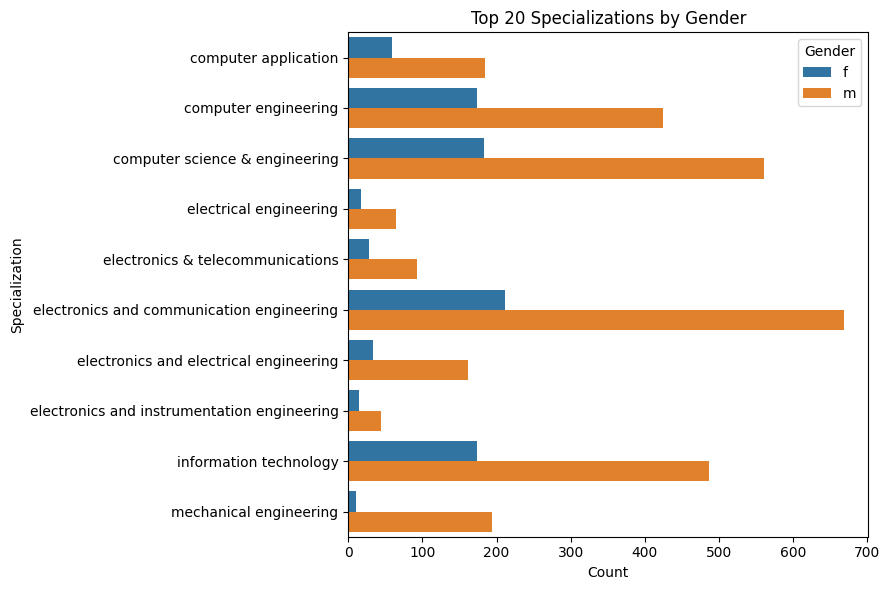

In [39]:

# Step 2: Data preparation
# Count the number of genders within each specialization
gender_counts = data.groupby(['Specialization', 'Gender']).size().reset_index(name='Count')

# Sum counts across genders to find the top 20 specializations
top_specializations = gender_counts.groupby('Specialization')['Count'].sum().nlargest(10).reset_index()

# Filter the gender_counts to only include these top specializations
top_gender_counts = gender_counts[gender_counts['Specialization'].isin(top_specializations['Specialization'])]

# Step 3: Plotting
plt.figure(figsize=(9, 6))
sns.barplot(x='Count', y='Specialization', hue='Gender', data=top_gender_counts, ci=None)

# Add some customization and titles
plt.title('Top 20 Specializations by Gender')
plt.xlabel('Count')
plt.ylabel('Specialization')
plt.legend(title='Gender')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


* Male participation is approximately double than females accross all specializatoins, with some females opting for        mechanical and electrical engg.

* Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs  as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a  fresh graduate.” Test this claim with the data given to you

In [40]:
data[(data['Designation'] == 'software engineer')|(data['Designation']== 'programming analyst')|(data['Designation']=='hardware engineer')|(data['Designation']=='associate engineer')]

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age,Experience
19,325000.0,2014-09-01,2015-12-31,software engineer,Pune,f,1990-11-30,79.00,cbse,2008,...,-1,-1,-1,0.8192,0.2668,-0.2714,-0.40780,-0.1295,25,1
20,320000.0,2010-11-01,2012-09-01,software engineer,Bangalore,f,1988-07-25,91.20,karnataka secondary school of examination,2006,...,-1,-1,-1,-0.1082,0.9688,0.5269,-0.29020,0.3444,27,2
21,200000.0,2012-08-01,2013-12-01,software engineer,N/A,f,1991-08-20,75.67,up,2007,...,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,24,1
31,340000.0,2014-08-01,2015-04-01,software engineer,Bangalore,m,1992-10-23,77.20,state board,2010,...,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889,23,1
36,270000.0,2013-03-01,2015-12-31,software engineer,Hyderabad,f,1992-08-21,91.50,state board,2009,...,-1,-1,-1,-1.0208,0.2124,0.4711,0.27270,-0.0943,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,550000.0,2013-07-01,2014-04-01,software engineer,Bangalore,m,1989-07-22,69.16,up board,2006,...,-1,-1,-1,-0.5719,0.5008,-0.4891,0.41480,-1.2354,26,1
3981,220000.0,2014-09-01,2015-12-31,software engineer,Gurgaon,m,1991-12-17,53.40,cbse,2009,...,-1,-1,-1,0.1282,-0.2871,-0.1437,-1.12180,1.4386,24,1
3984,480000.0,2011-12-01,2015-12-31,software engineer,Gurgaon,f,1990-01-18,89.80,cbse,2007,...,-1,-1,-1,-0.2628,0.1888,0.3817,-0.29020,1.6082,25,4
3989,300000.0,2014-09-01,2015-12-31,software engineer,Bangalore,m,1991-11-23,74.88,state board,2010,...,-1,-1,-1,0.1282,0.0459,1.2396,1.03330,0.6721,24,1


In [41]:
cse = data[(data['Degree'] == 'computer science & engineering') & (data['Salary'] > 0)]

specified_jobs = cse[cse['Designation'].isin(['programming analyst', 'software engineer', 'hardware Eengineer', 'associate engineer'])]

#  the average salary for these job roles
average_salary = specified_jobs['Salary'].mean()

# Claimed salary range
claimed_salary_range = (250000, 300000)

# Test the claim

if average_salary >= claimed_salary_range[0] and average_salary <= claimed_salary_range[1]:
    print("The claim is supported by the data.")
    
else:
    print("The claim is not supported by the data.")

The claim is not supported by the data.
